<a href="https://colab.research.google.com/github/zahraa57/Deep-Learning-CV/blob/main/Assignment_1_CIFAR_10_wiht_Dense_layers_1_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10


In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10 .load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

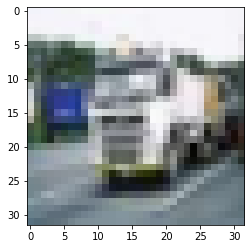

In [ ]:
import matplotlib.pyplot as plt
img = train_images[1000]
plt.imshow(np.reshape(img, (32,32,3)))


In [ ]:
# input array
train_arr =  train_labels.flatten()
df=pd.DataFrame( data=train_arr ,columns=["train"])
df.head()


,train
0,6
1,9
2,9
3,4
4,1


In [ ]:
df_sorted=pd.DataFrame(df.sort_values(by=["train"]))

In [ ]:
df_sorted.head()

,train
29513,0
16836,0
32316,0
32318,0
32326,0


In [ ]:
df_sorted["train"].value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: train, dtype: int64

In [ ]:
test_arr=test_labels.flatten()
df1=pd.DataFrame( data=test_arr ,columns=["test"])
df_sorted1=pd.DataFrame(df1.sort_values(by=["test"]))
df.head()

,train
0,6
1,9
2,9
3,4
4,1


In [ ]:
df_sorted1["test"].value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: test, dtype: int64

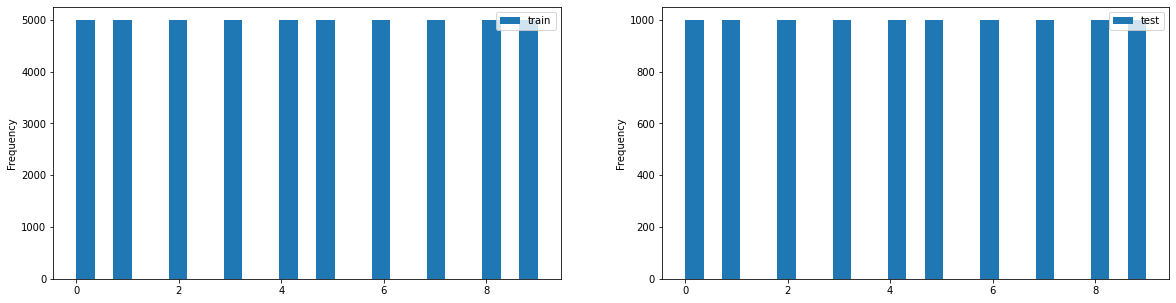

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
#plot 1:

df_sorted.plot.hist(by="train",bins=25,ax=axes[0])
#plot 2:

df_sorted1.plot.hist(by="test",bins=25,ax=axes[1])


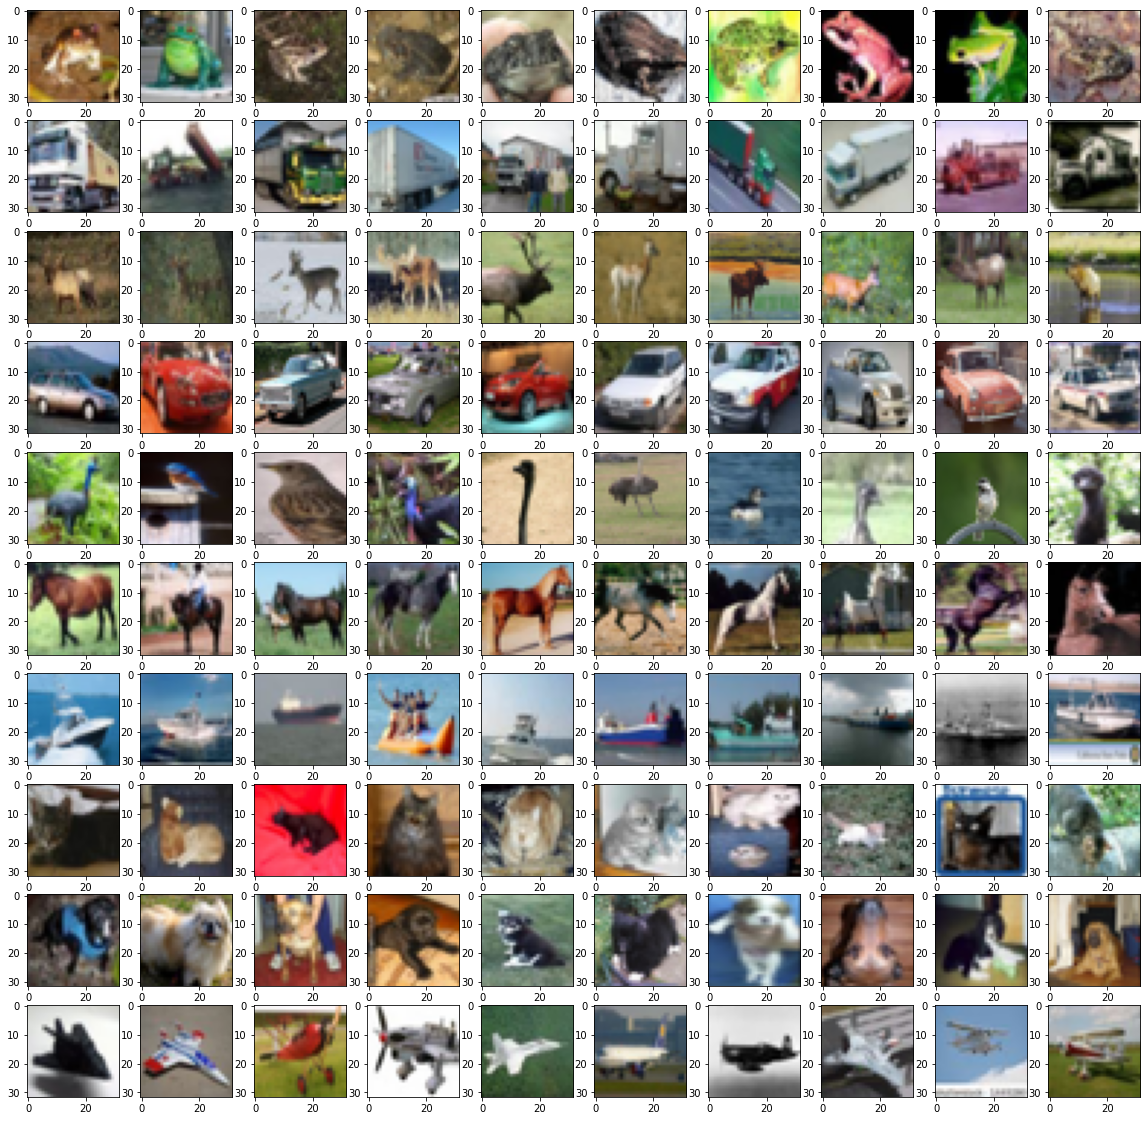

In [ ]:
c=1
fig = plt.figure(figsize=(20,20))
for i in  df['train'].unique():
  idx=np.array(list(np.where(df['train']==i))).flatten()[:10]
  for l in range(10):
    ax1 = fig.add_subplot(10,10,c)
    ax1.imshow(train_images[idx[l]])
    c=c+1 

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
train_images = train_images.reshape((50000, 32 * 32*3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
train_labels.shape

(50000, 10)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32*32*3,)))
network.add(layers.Dense(256, activation='relu', name='Layer_2'))
network.add(layers.Dense(128, activation='relu', name='Layer_3'))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=10*np.e**-3)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 13s 32ms/step - loss: 71362.2656 - accuracy: 0.0990
Epoch 2/10
391/391 [==============================] - 13s 32ms/step - loss: 2.3183 - accuracy: 0.0979
Epoch 3/10
391/391 [==============================] - 13s 32ms/step - loss: 2.3223 - accuracy: 0.1006
Epoch 4/10
391/391 [==============================] - 14s 36ms/step - loss: 2.3259 - accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 22s 57ms/step - loss: 2.3235 - accuracy: 0.0997
Epoch 6/10
391/391 [==============================] - 13s 32ms/step - loss: 2.3272 - accuracy: 0.1005
Epoch 7/10
391/391 [==============================] - 13s 32ms/step - loss: 2.3309 - accuracy: 0.1006
Epoch 8/10
391/391 [==============================] - 12s 32ms/step - loss: 2.3258 - accuracy: 0.1008
Epoch 9/10
391/391 [==============================] - 13s 32ms/step - loss: 2.3319 - accuracy: 0.1012
Epoch 10/10
391/391 [==============================] - 12s 32ms/step - loss: 2

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 2.3508 - accuracy: 0.1000


In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32*32*3,)))
network.add(layers.Dense(256, activation='relu', name='Layer_2'))
network.add(layers.Dense(128, activation='relu', name='Layer_3'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer="rmsprop",
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 18s 43ms/step - loss: 2.1349 - accuracy: 0.2483
Epoch 2/10
391/391 [==============================] - 16s 42ms/step - loss: 1.7978 - accuracy: 0.3507
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 1.6996 - accuracy: 0.3916
Epoch 4/10
391/391 [==============================] - 16s 40ms/step - loss: 1.6285 - accuracy: 0.4174
Epoch 5/10
391/391 [==============================] - 16s 40ms/step - loss: 1.5774 - accuracy: 0.4371
Epoch 6/10
391/391 [==============================] - 16s 40ms/step - loss: 1.5348 - accuracy: 0.4510
Epoch 7/10
391/391 [==============================] - 16s 41ms/step - loss: 1.4989 - accuracy: 0.4645
Epoch 8/10
391/391 [==============================] - 16s 40ms/step - loss: 1.4662 - accuracy: 0.4742
Epoch 9/10
391/391 [==============================] - 16s 41ms/step - loss: 1.4325 - accuracy: 0.4914
Epoch 10/10
391/391 [==============================] - 16s 42ms/step - loss: 1.403

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 1.5457 - accuracy: 0.4581


In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32*32*3,)))
network.add(layers.Dense(256, activation='relu', name='Layer_2'))
network.add(layers.Dense(128, activation='relu', name='Layer_3'))
network.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam()

network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=10, batch_size=128)


Epoch 1/10
391/391 [==============================] - 13s 32ms/step - loss: 1.8773 - accuracy: 0.3215
Epoch 2/10
391/391 [==============================] - 13s 32ms/step - loss: 1.6831 - accuracy: 0.3931
Epoch 3/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5935 - accuracy: 0.4296
Epoch 4/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5307 - accuracy: 0.4511
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 1.4905 - accuracy: 0.4666
Epoch 6/10
391/391 [==============================] - 14s 35ms/step - loss: 1.4543 - accuracy: 0.4809
Epoch 7/10
391/391 [==============================] - 13s 32ms/step - loss: 1.4182 - accuracy: 0.4945
Epoch 8/10
391/391 [==============================] - 13s 33ms/step - loss: 1.3944 - accuracy: 0.5032
Epoch 9/10
391/391 [==============================] - 13s 32ms/step - loss: 1.3606 - accuracy: 0.5149
Epoch 10/10
391/391 [==============================] - 13s 32ms/step - loss: 1.338

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 1.4089 - accuracy: 0.4996
